In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 
from PIL import Image

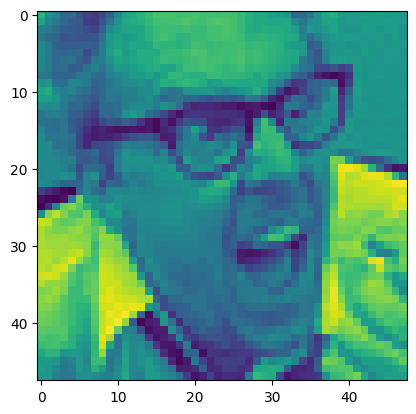

In [2]:
file='train/angry/Training_3908.jpg'
image=Image.open(file)
np_img=np.array(image)
plt.imshow(image)

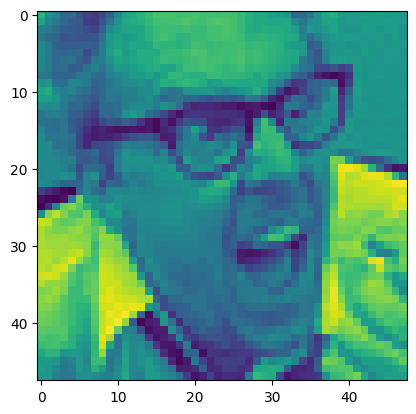

In [3]:
id_kernel=np.array([
    [0,0,0],
    [0,1,0],
    [0,0,0]
])
img_id_kernel=cv2.filter2D(src=np_img,ddepth=-1,kernel=id_kernel)
plt.imshow(img_id_kernel)

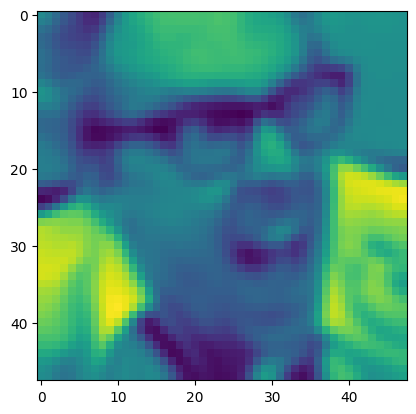

In [4]:
gaussian_blur = cv2.GaussianBlur(src=np_img, ksize=(5, 5), sigmaX=1)
plt.imshow(gaussian_blur)

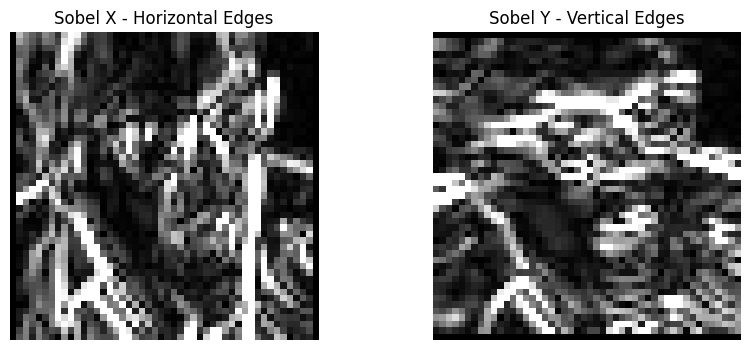

In [5]:
sobelx = cv2.Sobel(src=np_img, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)
sobely = cv2.Sobel(src=np_img, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.convertScaleAbs(sobelx), cmap='gray')
plt.title('Sobel X - Horizontal Edges')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.convertScaleAbs(sobely), cmap='gray')
plt.title('Sobel Y - Vertical Edges')
plt.axis('off')
plt.show()

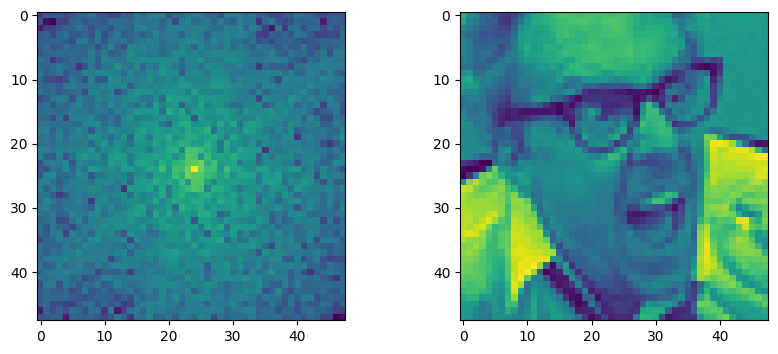

In [6]:
gray_img=np.array(image.convert('L'))
fnpimg=np.fft.fft2(gray_img)
fshift=np.fft.fftshift(fnpimg)
magnitude_spectrum = 20 * np.log(np.abs(fshift))
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(magnitude_spectrum)
plt.subplot(1, 2, 2)
plt.imshow(gray_img)

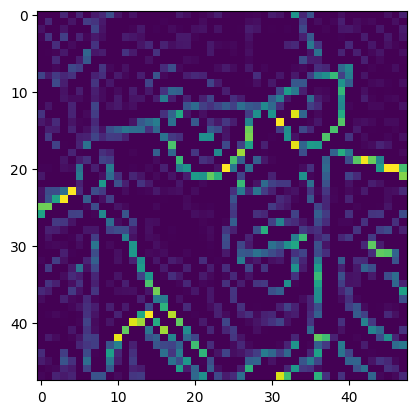

In [7]:
lap_npimg=cv2.Laplacian(np_img,ddepth=-1)
plt.imshow(lap_npimg)

In [8]:
print(type(np_img))
print(np_img.shape)


<class 'numpy.ndarray'>
(48, 48)


In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

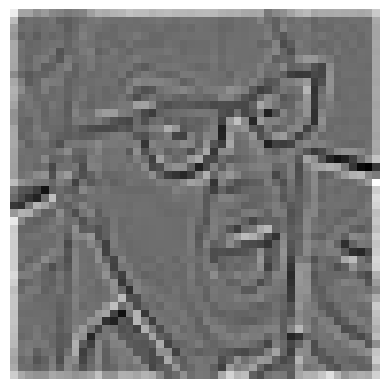

In [10]:
img = np_img.reshape(48, 48, 1)  # or: np.expand_dims(np_img, axis=-1)
img = np.expand_dims(img, axis=0)  # now: (1,48,48,1)
# Use the edge kernel you defined
edge_kernel = tf.constant(
    [[-1, -1, -1],
     [-1,  8, -1],
     [-1, -1, -1]],
    dtype=tf.float32
)

image = tf.image.convert_image_dtype(np_img, dtype=tf.float32)
image = tf.expand_dims(image, axis=-1)  # add channel -> (48,48,1)
image = tf.expand_dims(image, axis=0)   # add batch -> (1,48,48,1)

kernel = tf.reshape(edge_kernel, [3, 3, 1, 1])   # [kH,kW,in_channels,out_channels]

out = tf.nn.conv2d(
    input=image,
    filters=kernel,
    strides=[1,1,1,1],
    padding='SAME'
)
activated = tf.nn.relu(out)
pooled = tf.nn.max_pool2d(activated, ksize=2, strides=1, padding="SAME")
plt.imshow(tf.squeeze(out), cmap='gray')
plt.axis('off')
plt.show()

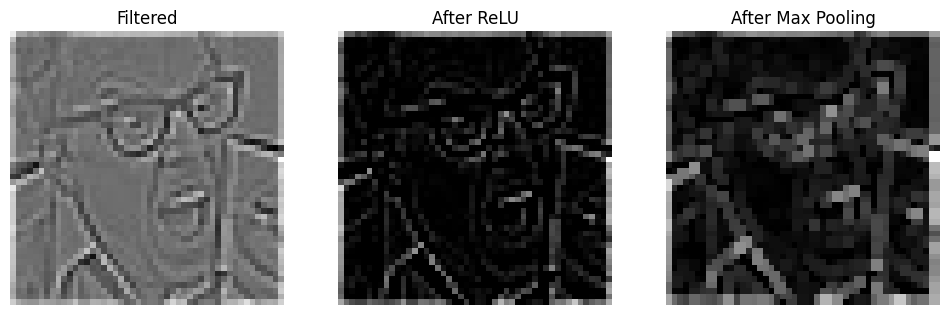

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].imshow(tf.squeeze(out), cmap="gray")
axs[0].set_title("Filtered")
axs[0].axis("off")

axs[1].imshow(tf.squeeze(activated), cmap="gray")
axs[1].set_title("After ReLU")
axs[1].axis("off")

axs[2].imshow(tf.squeeze(pooled), cmap="gray")
axs[2].set_title("After Max Pooling")
axs[2].axis("off")

plt.show()

In [12]:
# kernel = tf.reshape(edge_kernel, [3, 3, 1, 1])    # 1 channel only

# # 4. Convolution
# filtered = tf.nn.conv2d(
#     image, 
#     filters=kernel, 
#     strides=[1,1,1,1],
#     padding="SAME"
# )

# # 5. ReLU activation
# activated = tf.nn.relu(filtered)

# # 6. Max pooling
# pooled = tf.nn.max_pool2d(
#     activated, 
#     ksize=2, 
#     strides=1, 
#     padding="SAME"
# )

# # 7. Visualization
# fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# axs[0].imshow(tf.squeeze(filtered), cmap="gray")
# axs[0].set_title("Filtered")
# axs[0].axis("off")

# axs[1].imshow(tf.squeeze(activated), cmap="gray")
# axs[1].set_title("After ReLU")
# axs[1].axis("off")

# axs[2].imshow(tf.squeeze(pooled), cmap="gray")
# axs[2].set_title("After Max Pooling")
# axs[2].axis("off")

# plt.show()

In [13]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "train",
    labels="inferred",
    label_mode="int",
    image_size=(48,48),
    color_mode="grayscale",  # VERY IMPORTANT
    batch_size=32,
    shuffle=True
)
test_ds=tf.keras.utils.image_dataset_from_directory(
    "test",
    labels="inferred",
    label_mode="int",
    image_size=(48,48),
    color_mode="grayscale",  # VERY IMPORTANT
    batch_size=32,
    shuffle=True
)

Found 34264 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


In [14]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [15]:
IMG_SIZE = (48, 48)
BATCH_SIZE = 32

In [16]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "train",
    # validation_split=0.2,
    # subset="training",
    seed=42,
    labels="inferred",
    label_mode="int",
    image_size=IMG_SIZE,
    color_mode="grayscale",
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "test",
    # validation_split=0.2,
    # subset="validation",
    seed=42,
    labels="inferred",
    label_mode="int",
    image_size=IMG_SIZE,
    color_mode="grayscale",
    batch_size=BATCH_SIZE
)


Found 34264 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


In [17]:
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
val_ds = val_ds.map(lambda x, y: (x / 255.0, y))


In [18]:
from tensorflow.keras import layers
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

# Apply augmentation before the CNN
augmented_train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y))

In [ ]:
from tensorflow.keras import layers, models

cnn_model = models.Sequential([
    # -------------------------
    # BLOCK 1
    # -------------------------
    layers.Input(shape=(48,48,1)),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    # -------------------------
    # BLOCK 2
    # -------------------------
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    # -------------------------
    # BLOCK 3
    # -------------------------
    layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(0.30),

    # -------------------------
    # BLOCK 4
    # -------------------------
    layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(0.40),

    # -------------------------
    # CLASSIFIER HEAD
    # -------------------------
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(7, activation='softmax')
])


cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [20]:
history = cnn_model.fit(
    augmented_train_ds,
    validation_data=val_ds,
    epochs=20
)

Epoch 1/20
1071/1071 ━━━━━━━━━━━━━━━━━━━━ 237s 216ms/step - accuracy: 0.2294 - loss: 2.0693 - val_accuracy: 0.3395 - val_loss: 1.6935
Epoch 2/20
1071/1071 ━━━━━━━━━━━━━━━━━━━━ 228s 213ms/step - accuracy: 0.3564 - loss: 1.6447 - val_accuracy: 0.4355 - val_loss: 1.4661
Epoch 3/20
1071/1071 ━━━━━━━━━━━━━━━━━━━━ 227s 212ms/step - accuracy: 0.4421 - loss: 1.4507 - val_accuracy: 0.3547 - val_loss: 1.5966
Epoch 4/20
1071/1071 ━━━━━━━━━━━━━━━━━━━━ 227s 212ms/step - accuracy: 0.4846 - loss: 1.3549 - val_accuracy: 0.4962 - val_loss: 1.2943
Epoch 5/20
1071/1071 ━━━━━━━━━━━━━━━━━━━━ 225s 210ms/step - accuracy: 0.5078 - loss: 1.2999 - val_accuracy: 0.5188 - val_loss: 1.2368
Epoch 6/20
1071/1071 ━━━━━━━━━━━━━━━━━━━━ 225s 210ms/step - accuracy: 0.5278 - loss: 1.2536 - val_accuracy: 0.5553 - val_loss: 1.1530
Epoch 7/20
1071/1071 ━━━━━━━━━━━━━━━━━━━━ 226s 211ms/step - accuracy: 0.5478 - loss: 1.2115 - val_accuracy: 0.5265 - val_loss: 1.2064
Epoch 8/20
1071/1071 ━━━━━━━━━━━━━━━━━━━━ 226s 211ms/step - ac

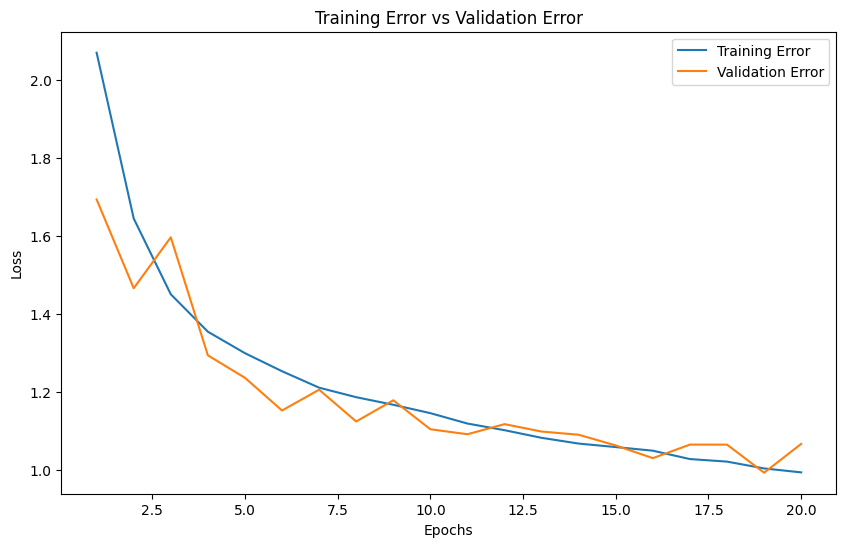

In [21]:
# Extracting loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plotting the training error vs validation error
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Error')
plt.plot(epochs, val_loss, label='Validation Error')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Error vs Validation Error')
plt.legend()
plt.show()

In [22]:
test_loss, test_accuracy = cnn_model.evaluate(val_ds)

# Print the results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

225/225 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - accuracy: 0.6126 - loss: 1.0676
Test Loss: 1.0675568580627441
Test Accuracy: 0.6125661730766296


In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, datasets
import timm

In [24]:
IMG_SIZE = 224

transform_train = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),    # 1 -> 3 channels
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],     # ImageNet mean
                         [0.229, 0.224, 0.225])     # ImageNet std
])

transform_val = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])


In [25]:
train_dataset = datasets.ImageFolder("train", transform=transform_train)
val_dataset = datasets.ImageFolder("test", transform=transform_val)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [26]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = timm.create_model("efficientnet_b0", pretrained=True, num_classes=7)
model = model.to(device)


In [27]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)


In [28]:
num_epochs = 20

for epoch in range(num_epochs):
    model.train()
    running_loss = 0
    correct = 0
    total = 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
    
    epoch_loss = running_loss / total
    epoch_acc = correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")


Epoch 1/20, Loss: 1.2518, Accuracy: 0.5382
Epoch 2/20, Loss: 1.0040, Accuracy: 0.6244
Epoch 3/20, Loss: 0.9334, Accuracy: 0.6536
Epoch 4/20, Loss: 0.8842, Accuracy: 0.6734
Epoch 5/20, Loss: 0.8319, Accuracy: 0.6893
Epoch 6/20, Loss: 0.7804, Accuracy: 0.7124
Epoch 7/20, Loss: 0.7321, Accuracy: 0.7290
Epoch 8/20, Loss: 0.6824, Accuracy: 0.7485
Epoch 9/20, Loss: 0.6238, Accuracy: 0.7678
Epoch 10/20, Loss: 0.5712, Accuracy: 0.7891
Epoch 11/20, Loss: 0.5140, Accuracy: 0.8142
Epoch 12/20, Loss: 0.4602, Accuracy: 0.8326
Epoch 13/20, Loss: 0.4214, Accuracy: 0.8443
Epoch 14/20, Loss: 0.3786, Accuracy: 0.8622
Epoch 15/20, Loss: 0.3397, Accuracy: 0.8784
Epoch 16/20, Loss: 0.3068, Accuracy: 0.8906
Epoch 17/20, Loss: 0.2832, Accuracy: 0.8973
Epoch 18/20, Loss: 0.2659, Accuracy: 0.9051
Epoch 19/20, Loss: 0.2466, Accuracy: 0.9110
Epoch 20/20, Loss: 0.2252, Accuracy: 0.9187


In [29]:
model.eval()
val_correct = 0
val_total = 0

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        val_correct += (preds == labels).sum().item()
        val_total += labels.size(0)

val_acc = val_correct / val_total
print(f"Validation Accuracy: {val_acc:.6f}")


Validation Accuracy: 0.683199


In [30]:
anger_image='C:/Users/lapto/OneDrive/Desktop/computer vision projects/facial expression detector/archive (2)/anger/S014_003_00000028.png'
happy_image='C:/Users/lapto/OneDrive/Desktop/computer vision projects/facial expression detector/archive (2)/happy/S032_006_00000016.png'
disgust_image='C:/Users/lapto/OneDrive/Desktop/computer vision projects/facial expression detector/archive (2)/digust/'
fear_image='C:/Users/lapto/OneDrive/Desktop/computer vision projects/facial expression detector/archive (2)/fear/S091_001_00000015.png'
neutral_image='C:/Users/lapto/OneDrive/Desktop/computer vision projects/facial expression detector/archive (2)/contempt/S138_008_00000009.png'
sad_image='C:/Users/lapto/OneDrive/Desktop/computer vision projects/facial expression detector/archive (2)/sadness/S014_002_00000014.png'
surprise_image='C:/Users/lapto/OneDrive/Desktop/computer vision projects/facial expression detector/archive (2)/surprise/'


In [31]:
class_names = ["angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"]


In [32]:
def prepare_image(img):
    # 1) convert BGR → grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 2) resize to (48,48)
    img = cv2.resize(img, (48, 48))

    # 3) normalize to [0,1]
    img = img.astype("float32") / 255.0

    # 4) add channel dim → (48, 48, 1)
    img = np.expand_dims(img, axis=-1)

    # 5) add batch dim → (1, 48, 48, 1)
    img = np.expand_dims(img, axis=0)

    return img


In [33]:
img = Image.open(anger_image).convert("L")  # ensure grayscale

# Apply SAME transforms as validation
img_tensor = transform_val(img).unsqueeze(0)  # shape: (1, 3, 224, 224)

img_tensor = img_tensor.to(device)

# Predict
model.eval()
with torch.no_grad():
    logits = model(img_tensor)
    probabilities = torch.softmax(logits, dim=1)
    predicted_class = torch.argmax(probabilities, dim=1).item()

print("Predicted class:", class_names[predicted_class])
print("Probabilities:", probabilities.cpu().numpy())

Predicted class: surprise
Probabilities: [[2.6885736e-01 1.1127408e-03 3.1044029e-04 4.2702501e-05 5.9398641e-03
  7.2338897e-01 3.4794331e-04]]


In [34]:
model.eval()
with torch.no_grad():
    outputs = model(img_tensor.to(device))
    probabilities = torch.softmax(outputs, dim=1)
    predicted_class = torch.argmax(probabilities, dim=1).item()



print("Predicted class:", class_names[predicted_class])
print("Probabilities:", probabilities.cpu().numpy())    

Predicted class: surprise
Probabilities: [[2.6885736e-01 1.1127408e-03 3.1044029e-04 4.2702501e-05 5.9398641e-03
  7.2338897e-01 3.4794331e-04]]


In [35]:
img = cv2.imread(anger_image) 
img=prepare_image(img)


pred = cnn_model.predict(img)
pred_label = class_names[np.argmax(pred)]
print("emotions probability:", pred)
print("Predicted emotion:", pred_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
emotions probability: [[0.37268567 0.06737705 0.0559528  0.00252397 0.11338274 0.3851414
  0.00293634]]
Predicted emotion: surprise
